In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

sns.set_theme()

In [21]:
posteriors_npEM = pd.read_csv("./results/np_posteriors/npEM_k_8_1_5_CPMcutoff_suffix_1_log_cero_replacement_posteriors.csv", index_col = 0)
posteriors_npMSL = pd.read_csv("./results/np_posteriors/npMSL_k_8_1_5_CPMcutoff_suffix_1_log_cero_replacement_posteriors.csv", index_col = 0)
data_points_log = pd.read_csv("./data/1_5_CPMcutoff_suffix_1_log_cero_replacement.csv", index_col = 0)

In [11]:
poisson_posteriors = pd.read_csv("./results/poisson_cluster_posteriors_9.csv",index_col=0)
poisson_data = pd.read_csv("./results/poisson_cluster_data_points.csv", index_col=0)

In [14]:
def change_width(ax, new_value) :
    cnt = 0
    for patch in ax.patches :
        current_width = patch.get_width()
        patch.set_width(new_value[cnt] * len(new_value))
        patch.set_x((np.cumsum(new_value)[cnt]-new_value[cnt])*len(new_value))
        cnt = (cnt+1) % len(new_value)
            
def lambda_plotting(data_points, posteriors = None, labels = None,ax = None):    
    if posteriors is None and labels is None :
        raise Exception('posteriors and labels can\'t be both None!') 
    if ax is None :
        raise Exception('ax can not be null')
    if labels is None :
        labels = pd.DataFrame(pd.Series(np.argmax(posteriors.values, axis=1)))
    
    
    data_points_percentage = data_points.copy()
    data_points_percentage['label'] = labels.values
    data_percentages = data_points_percentage.groupby('label').sum()

    for col in data_percentages:
        data_percentages[col] = data_percentages[col] / np.sum(data_percentages[col])
    sum_hor = np.sum(data_percentages, axis = 1)
    for col in data_percentages:
        data_percentages[col] = data_percentages[col] / sum_hor
    
    data_percentages.iloc[:,:] = np.cumsum(data_percentages.values, axis = 1)
    
    
    val,ori,label = [],[],[]
    for col in data_percentages:
        val.extend(data_percentages[col].values)
        ori.extend([col]*len(data_percentages))
        label.extend(list(range(1,len(data_percentages)+1)))
    df = pd.DataFrame({'value':val,'origin':ori, 'label': label})
    
    
    
    
    sns.barplot(data = df, 
                y = 'value', 
                x = 'label', 
                hue = 'origin', 
                dodge = False, 
                hue_order = data_percentages.columns[::-1], 
                palette = 'viridis',
                ax = ax
               );
    
    widths = labels.value_counts(normalize = True).sort_index().values
    change_width(ax = ax, new_value = widths)
    
    ax.set_xticks((np.cumsum(widths)-widths)*len(widths))
    ax.set_xticklabels(list(range(1,len(widths)+1)))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    #plt.tight_layout()

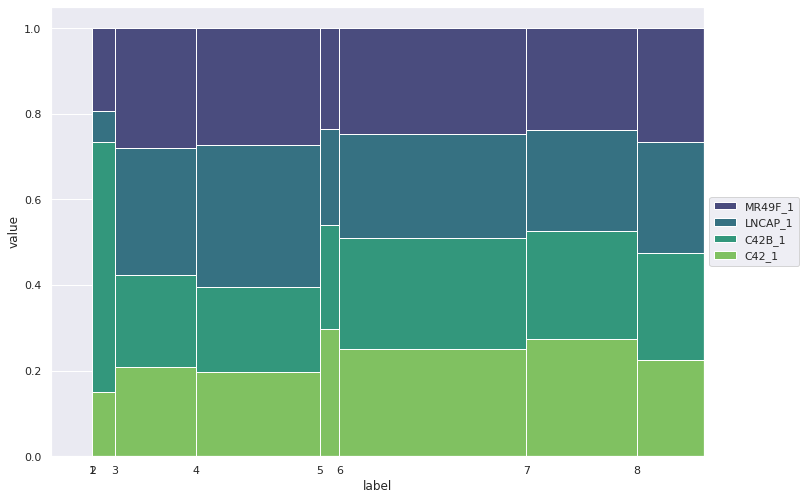

In [15]:
fig, ax = plt.subplots()
lambda_plotting(data_points_log, posteriors=posteriors_npEM, ax = ax);
fig.set_size_inches(11.7, 8.27)

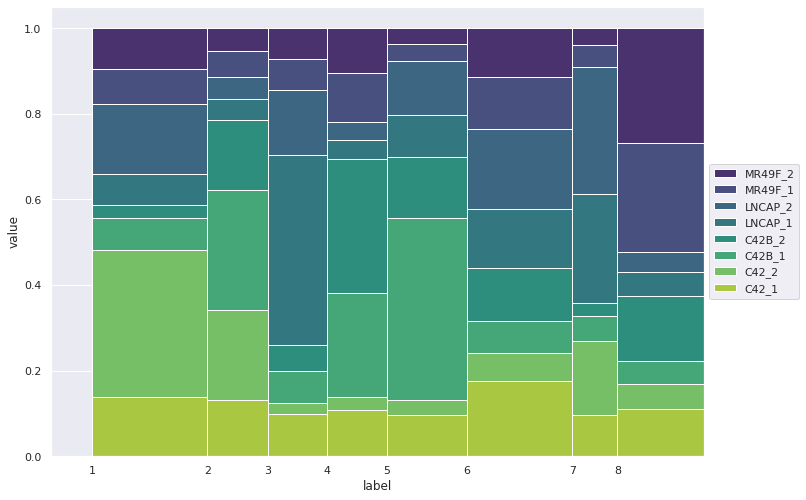

In [20]:
fig, ax = plt.subplots()
cols = ['C42_1','C42_2','C42B_1','C42B_2','LNCAP_1','LNCAP_2','MR49F_1','MR49F_2']
lambda_plotting(poisson_data[cols], posteriors=poisson_posteriors, ax = ax);
fig.set_size_inches(11.7, 8.27)

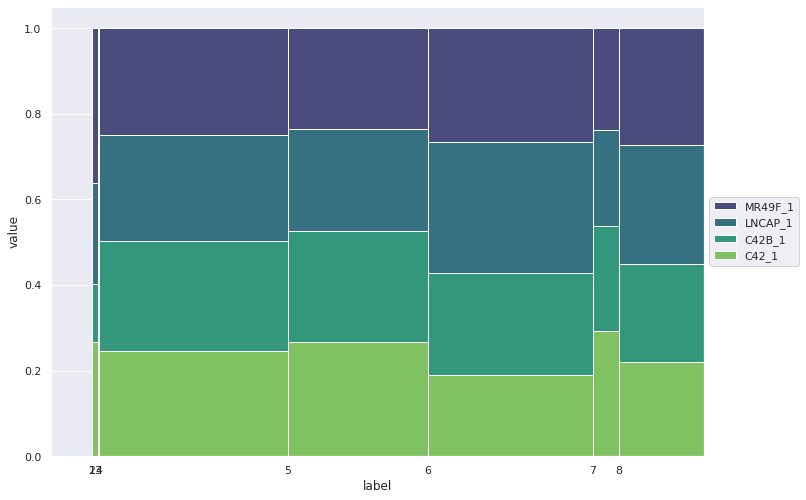

In [22]:
fig, ax = plt.subplots()
lambda_plotting(data_points_log, posteriors=posteriors_npMSL, ax = ax);
fig.set_size_inches(11.7, 8.27)